# 1. Introduction

## Overview of the Project

The global energy sector has seen significant transformation throughout these recent decades, with solar power emerging as a key pillar in the pursuit of the vision of sustainable energy. Countries around the world have undertaken numerous efforts to expedite the development of this sector, recognizing the importance of renewable energy in assuring universal access to clean, affordable, and reliable energy. Solar power systems dependability and efficiency are strongly reliant on our ability to precisely estimate its energy output.

DAC Green Energy Company is facing challenges in optimizing their solar power production. As part of their efforts to improve the efficiency and reliability of solar power output predictions, the company has compiled data from various sources over the period between 2014 and 2017.

From data collected at a site, you are a consultant for a solar panel production development team, you are tasked with evaluating and developing strategies to enhance the effectiveness of energy production from solar panels at a particular site, focusing on the fourth quarter of 2017. This evaluation will involve analyzing the area's various environmental and weather conditions to understand their impact on energy output. By doing so, you'll aim to uncover opportunities for optimizing the solar panel technology and improving overall production efficiency. This analysis is expected to provide a deeper insight into how various environmental factors affect the efficiency of solar power production, which can help the company with operational planning, maintenance, and strategy development to increase its energy output. Through this analysis, the company strives to achieve higher efficiency levels and reduce uncertainty in solar power production. This is important in supporting sustainability goals and reducing dependence on fossil energy sources.

## Data Sources

The first data collected was the solar power output rate, which provides information on how effectively the solar panels are producing energy relative to their maximum capacity. In addition, the company also collected weather data based on the location of the solar panels. Accurate and detailed weather information is important for understanding how atmospheric conditions affect the efficiency of solar panels over time. The last data source includes solar irradiance data. This data is important for analysis because solar irradiance is the main factor affecting solar power production, and wind conditions as well as temperature, which can also impact the efficiency of solar panels.

# 2. Data Preparation

## 2.1 Importing Libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime

## 2.2 Loading Datasets

In [71]:
weather = pd.read_csv('dataset/Weather.csv')
weather.head()

date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  1/1/2014 0:00        -3        -6           0.0      8.7        2   
1  1/1/2014 1:00        -3        -6           0.0      8.7        2   
2  1/1/2014 2:00        -3        -6           0.0      8.7        2   
3  1/1/2014 3:00        -3        -6           0.0      8.7        2   
4  1/1/2014 4:00        -3        -6           0.0      8.7        2   

   moon_illumination moonrise  moonset  sunrise  ... WindChillC  WindGustKmph  \
0                  1  6:58 AM  5:05 PM  7:12 AM  ...        -11            28   
1                  1  6:58 AM  5:05 PM  7:12 AM  ...        -12            31   
2                  1  6:58 AM  5:05 PM  7:12 AM  ...        -12            34   
3                  1  6:58 AM  5:05 PM  7:12 AM  ...        -13            36   
4                  1  6:58 AM  5:05 PM  7:12 AM  ...        -13            32   

   cloudcover  humidity  precipMM  pressure  tempC  visibility  winddirDegree  \
0           3        58       0.0      1022     -4          10            273   
1           4        58       0.0      1023     -5          10            274   
2           5        58       0.0      1024     -5          10            276   
3           6        58       0.0      1024     -5          10            278   
4           9        57       0.0      1025     -6          10            271   

   windspeedKmph  
0             20  
1             22  
2             25  
3             27  
4             23  

[5 rows x 24 columns]

In [72]:
solar_irradiance_2014 = pd.read_csv('dataset/Solar-irradiance/solar_irradiance_2014.csv')
solar_irradiance_2015 = pd.read_csv('dataset/Solar-irradiance/solar_irradiance_2015.csv')
solar_irradiance_2016 = pd.read_csv('dataset/Solar-irradiance/solar_irradiance_2016.csv')
solar_irradiance_2017 = pd.read_csv('dataset/Solar-irradiance/solar_irradiance_2017.csv')

In [73]:
solar_irradiance_2014.head()

Year  Month  Day  Hour  Minute  DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  \
0  2014      1    1     0       0  0.0  0.0  0.0           0.0           0.0   
1  2014      1    1     1       0  0.0  0.0  0.0           0.0           0.0   
2  2014      1    1     2       0  0.0  0.0  0.0           0.0           0.0   
3  2014      1    1     3       0  0.0  0.0  0.0           0.0           0.0   
4  2014      1    1     4       0  0.0  0.0  0.0           0.0           0.0   

   Clearsky GHI      Cloud Type  Dew Point  Solar Zenith Angle  \
0           0.0  Probably Clear         -6              124.02   
1           0.0  Probably Clear         -5              135.09   
2           0.0  Probably Clear         -5              145.77   
3           0.0  Probably Clear         -6              155.07   
4           0.0  Probably Clear         -8              160.55   

   Surface Albedo  Wind Speed  Relative Humidity  Temperature  Pressure  
0            0.12         3.5              78.43           -3      1010  
1            0.12         3.8              81.74           -3      1010  
2            0.12         4.2              81.25           -3      1010  
3            0.12         4.5              74.14           -3      1010  
4            0.12         4.6              72.80           -4      1010

In [74]:
solar_irradiance_2014.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                  int64
DHI                   float64
DNI                   float64
GHI                   float64
Clearsky DHI          float64
Clearsky DNI          float64
Clearsky GHI          float64
Cloud Type             object
Dew Point               int64
Solar Zenith Angle    float64
Surface Albedo        float64
Wind Speed            float64
Relative Humidity     float64
Temperature             int64
Pressure                int64
dtype: object

## 2.3 Data Cleaning

In [75]:
solar_irradiance = pd.concat([solar_irradiance_2014, solar_irradiance_2015, solar_irradiance_2016, solar_irradiance_2017])

# Check is the dataset already concatenated
solar_irradiance.Year.unique()

array([2014, 2015, 2016, 2017], dtype=int64)

In [76]:
solar_irradiance.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'GHI',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')

In [77]:
solar_irradiance[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Cloud Type']] = solar_irradiance[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Cloud Type']].astype('category')

In [78]:
solar_irradiance = solar_irradiance.drop_duplicates()

In [79]:
columns_to_interpolate = ["DHI", "DNI", "GHI", "Clearsky DHI", "Clearsky DNI", "Clearsky GHI"]

In [80]:
for column in columns_to_interpolate:
    # Linear interpolation for each column
    solar_irradiance[column] = solar_irradiance[column].interpolate(method='linear', limit_direction='both')

In [81]:
solar_irradiance = solar_irradiance.ffill().bfill()


In [82]:
solar_irradiance.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
DHI                   0
DNI                   0
GHI                   0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Solar Zenith Angle    0
Surface Albedo        0
Wind Speed            0
Relative Humidity     0
Temperature           0
Pressure              0
dtype: int64

In [83]:
solar_irradiance.head()

Year Month Day Hour Minute  DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  \
0  2014     1   1    0      0  0.0  0.0  0.0           0.0           0.0   
1  2014     1   1    1      0  0.0  0.0  0.0           0.0           0.0   
2  2014     1   1    2      0  0.0  0.0  0.0           0.0           0.0   
3  2014     1   1    3      0  0.0  0.0  0.0           0.0           0.0   
4  2014     1   1    4      0  0.0  0.0  0.0           0.0           0.0   

   Clearsky GHI      Cloud Type  Dew Point  Solar Zenith Angle  \
0           0.0  Probably Clear         -6              124.02   
1           0.0  Probably Clear         -5              135.09   
2           0.0  Probably Clear         -5              145.77   
3           0.0  Probably Clear         -6              155.07   
4           0.0  Probably Clear         -8              160.55   

   Surface Albedo  Wind Speed  Relative Humidity  Temperature  Pressure  
0            0.12         3.5              78.43           -3      1010  
1            0.12         3.8              81.74           -3      1010  
2            0.12         4.2              81.25           -3      1010  
3            0.12         4.5              74.14           -3      1010  
4            0.12         4.6              72.80           -4      1010

## 2.4 Feature Engineering

In [84]:
# Create Timestamp Column
solar_irradiance['Timestamp'] = pd.to_datetime(solar_irradiance[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [85]:
solar_irradiance['DayOfYear'] = solar_irradiance['Timestamp'].dt.dayofyear
solar_irradiance['HourOfDay'] = solar_irradiance['Timestamp'].dt.hour
solar_irradiance['ClearSkyIndex_GHI'] = solar_irradiance['GHI'] / solar_irradiance['Clearsky GHI']
solar_irradiance['ClearSkyIndex_DNI'] = solar_irradiance['DNI'] / solar_irradiance['Clearsky DNI']
solar_irradiance['ClearSkyIndex_DHI'] = solar_irradiance['DHI'] / solar_irradiance['Clearsky DHI']


# 3. Exploratory Data Analysis (EDA)

## 3.1 Solar Irradiance Data Overview

In [86]:
solar_irradiance.describe()

DHI           DNI           GHI  Clearsky DHI  Clearsky DNI  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      63.836371    195.734642    171.464608     49.454868    320.805556   
std       94.801621    309.475284    253.602996     60.914778    361.170765   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       99.000000    334.000000    281.000000     95.000000    711.000000   
max      476.000000   1019.000000   1006.000000    416.000000   1019.000000   

       Clearsky GHI     Dew Point  Solar Zenith Angle  Surface Albedo  \
count  35064.000000  35064.000000        35064.000000    35064.000000   
mean     229.418492      6.565338           89.692060        0.231987   
std      298.855030      8.813138           35.050706        0.256447   
min        0.000000    -19.000000           18.950000        0.106000   
25%        0.000000      0.000000           62.600000        0.119000   
50%        0.000000      7.000000           89.675000        0.131000   
75%      438.000000     14.000000          116.640000        0.144000   
max     1012.000000     24.000000          161.150000        0.866000   

         Wind Speed  Relative Humidity   Temperature      Pressure  \
count  35064.000000       35064.000000  35064.000000  35064.000000   
mean       2.716022          83.034807      9.830424   1007.375371   
std        1.361537          15.843646      9.315040      8.734413   
min        0.100000          29.820000    -19.000000    970.000000   
25%        1.700000          72.040000      2.000000   1000.000000   
50%        2.500000          86.700000     10.000000   1010.000000   
75%        3.500000          97.900000     18.000000   1010.000000   
max       11.000000         100.000000     32.000000   1040.000000   

          DayOfYear     HourOfDay  ClearSkyIndex_GHI  ClearSkyIndex_DNI  \
count  35064.000000  35064.000000       17372.000000       17371.000000   
mean     183.125257     11.500000           0.739082           0.587379   
std      105.440146      6.922285           0.308944           0.433295   
min        1.000000      0.000000           0.012480           0.000000   
25%       92.000000      5.750000           0.487664           0.067690   
50%      183.000000     11.500000           0.875189           0.739437   
75%      274.000000     17.250000           1.000000           1.000000   
max      366.000000     23.000000           1.000000           1.483871   

       ClearSkyIndex_DHI  
count       17372.000000  
mean            1.247170  
std             0.616732  
min             0.032787  
25%             1.000000  
50%             1.000000  
75%             1.446154  
max             4.575758

In [87]:
solar_irradiance.dtypes

Year                        category
Month                       category
Day                         category
Hour                        category
Minute                      category
DHI                          float64
DNI                          float64
GHI                          float64
Clearsky DHI                 float64
Clearsky DNI                 float64
Clearsky GHI                 float64
Cloud Type                  category
Dew Point                      int64
Solar Zenith Angle           float64
Surface Albedo               float64
Wind Speed                   float64
Relative Humidity            float64
Temperature                    int64
Pressure                       int64
Timestamp             datetime64[ns]
DayOfYear                      int64
HourOfDay                      int64
ClearSkyIndex_GHI            float64
ClearSkyIndex_DNI            float64
ClearSkyIndex_DHI            float64
dtype: object

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\359393855.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = solar_irradiance.corr()


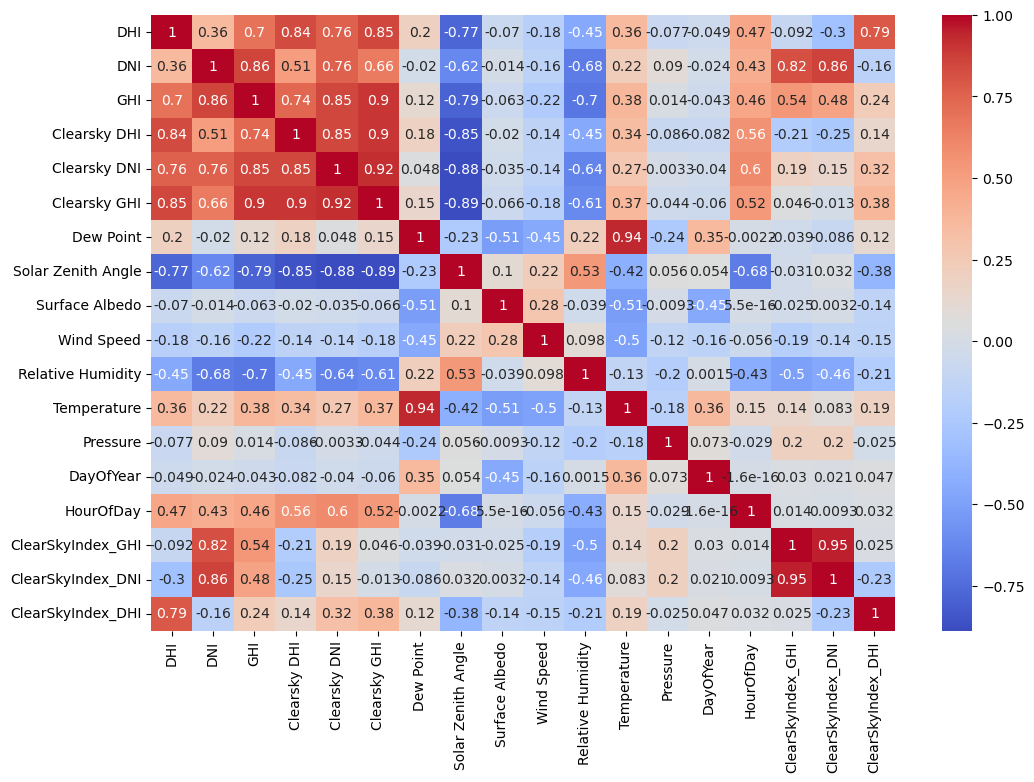

In [88]:
# Correlation matrix
corr_matrix = solar_irradiance.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



### Time Series Analysis (Weekly)

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\3271424495.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  solar_irradiance_weekly = solar_irradiance.resample('W', on='Timestamp').mean()


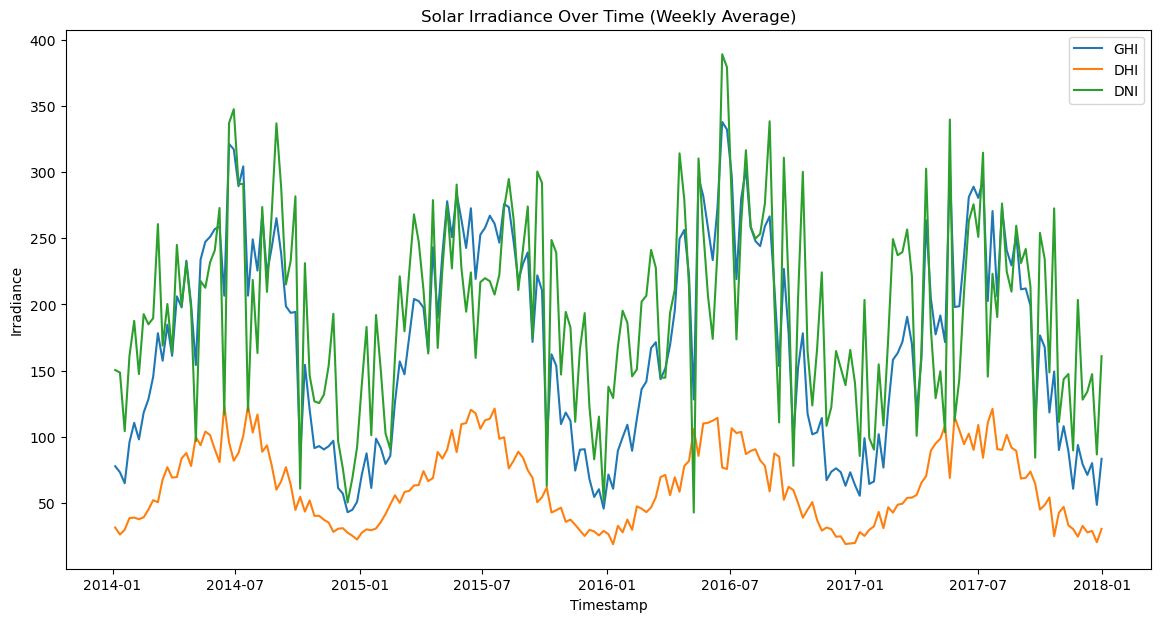

In [89]:
# Resampling the data on a weekly basis
solar_irradiance_weekly = solar_irradiance.resample('W', on='Timestamp').mean()

# Time series plot
plt.figure(figsize=(14, 7))
plt.plot(solar_irradiance_weekly.index, solar_irradiance_weekly['GHI'], label='GHI')
plt.plot(solar_irradiance_weekly.index, solar_irradiance_weekly['DHI'], label='DHI')
plt.plot(solar_irradiance_weekly.index, solar_irradiance_weekly['DNI'], label='DNI')
plt.legend()
plt.title('Solar Irradiance Over Time (Weekly Average)')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance')
plt.show()


### Distribution Analysis

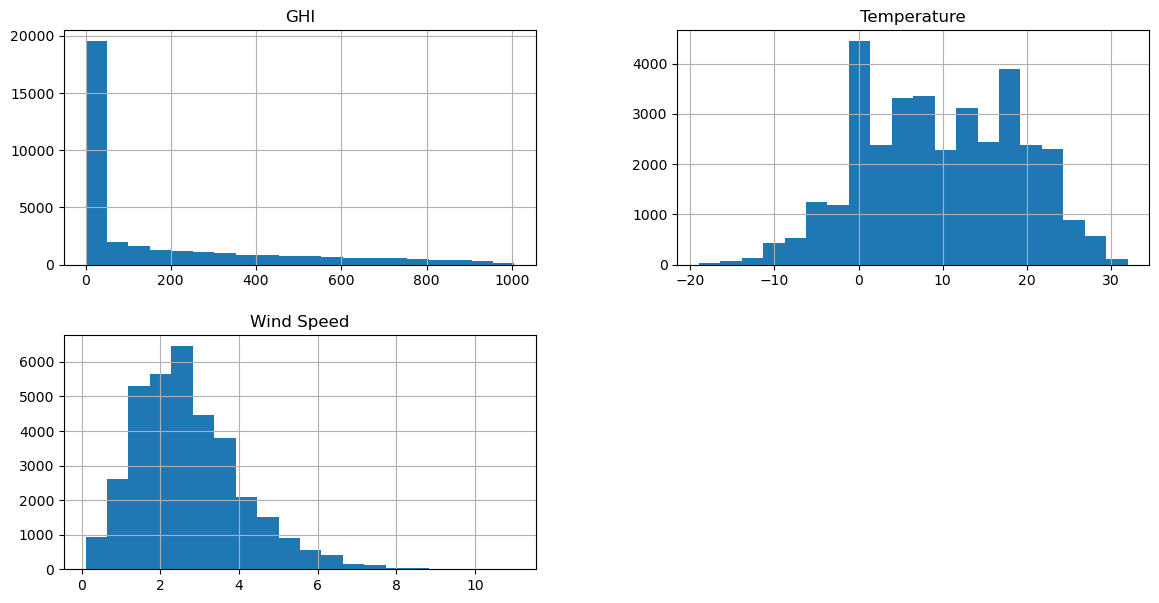

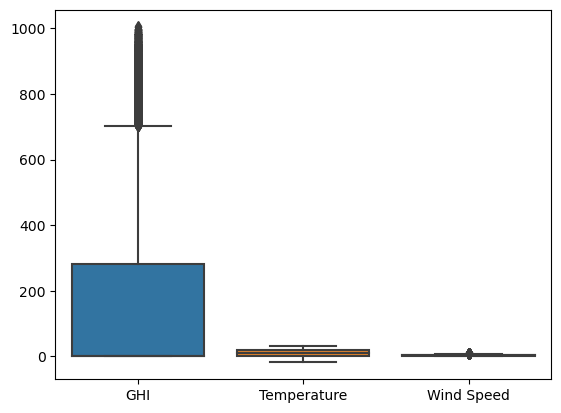

In [90]:
# Histogram
solar_irradiance[['GHI', 'Temperature', 'Wind Speed']].hist(bins=20, figsize=(14, 7))
plt.show()

# Boxplot
sns.boxplot(data=solar_irradiance[['GHI', 'Temperature', 'Wind Speed']])
plt.show()


### Impact of Categorical Variables

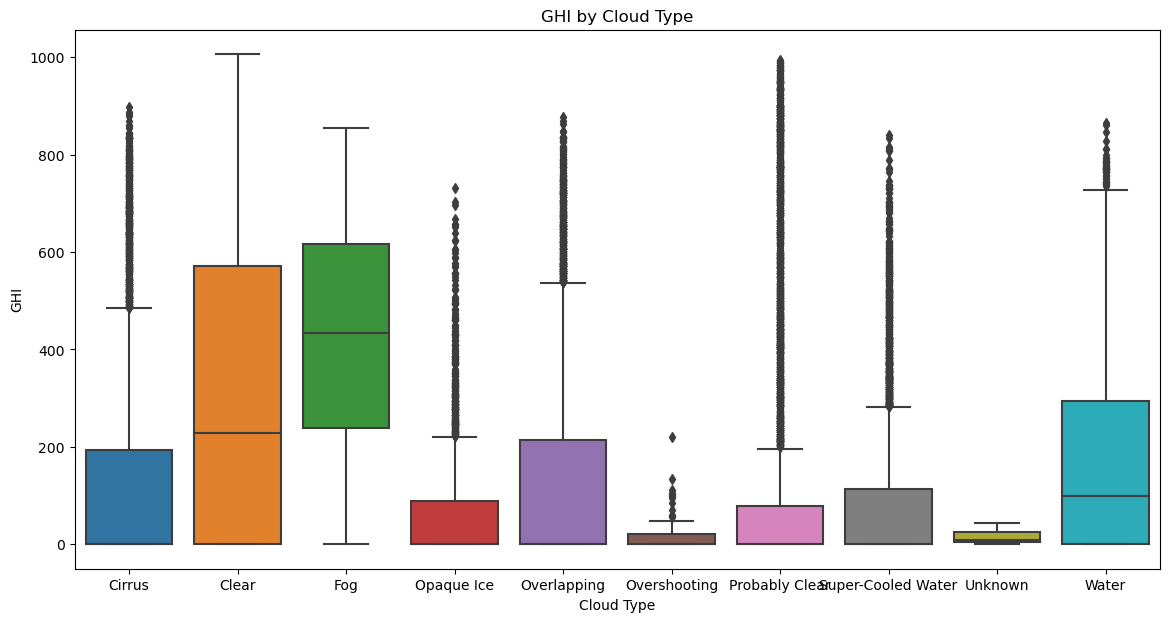

In [91]:
# Boxplot by Cloud Type
plt.figure(figsize=(14, 7))
sns.boxplot(x='Cloud Type', y='GHI', data=solar_irradiance)
plt.title('GHI by Cloud Type')
plt.show()


## 3.2 Weather Data Overview

### Summary Statistics

In [92]:
weather.describe()

maxtempC      mintempC  totalSnow_cm       sunHour       uvIndex  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      13.731006      7.455168      0.146680     10.000274      3.596167   
std        9.786960      8.873497      0.956313      3.468998      1.751477   
min      -12.000000    -21.000000      0.000000      3.400000      1.000000   
25%        6.000000      1.000000      0.000000      7.300000      2.000000   
50%       14.000000      8.000000      0.000000      9.900000      3.000000   
75%       22.000000     15.000000      0.000000     13.300000      5.000000   
max       32.000000     23.000000     22.200000     14.500000      7.000000   

       moon_illumination     DewPointC    FeelsLikeC    HeatIndexC  \
count       35064.000000  35064.000000  35064.000000  35064.000000   
mean           49.945243      6.197667      8.425308     10.822981   
std            28.873374      9.384617     11.873736      9.723045   
min             0.000000    -22.000000    -33.000000    -21.000000   
25%            25.000000      0.000000      0.000000      3.000000   
50%            50.000000      7.000000      9.000000     11.000000   
75%            75.000000     14.000000     18.000000     18.000000   
max           100.000000     25.000000     36.000000     36.000000   

         WindChillC  WindGustKmph    cloudcover      humidity      precipMM  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean       8.246150     25.511037     40.769450     75.951118      0.099632   
std       11.613175     12.089325     35.097364     14.604394      0.385746   
min      -33.000000      0.000000      0.000000     19.000000      0.000000   
25%        0.000000     17.000000      9.000000     66.000000      0.000000   
50%        9.000000     24.000000     31.000000     78.000000      0.000000   
75%       18.000000     33.000000     72.000000     88.000000      0.000000   
max       32.000000    100.000000    100.000000    100.000000     10.000000   

           pressure         tempC    visibility  winddirDegree  windspeedKmph  
count  35064.000000  35064.000000  35064.000000   35064.000000   35064.000000  
mean    1016.422684     10.540127      9.128280     201.886237      16.004535  
std        8.011529      9.332167      2.091107      92.556232       7.903426  
min      977.000000    -21.000000      0.000000       0.000000       0.000000  
25%     1012.000000      3.000000     10.000000     144.000000      10.000000  
50%     1016.000000     11.000000     10.000000     216.000000      15.000000  
75%     1021.000000     18.000000     10.000000     275.000000      21.000000  
max     1045.000000     32.000000     10.000000     360.000000      70.000000

In [93]:
weather.isna().sum()

date_time            0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

In [94]:
weather.drop_duplicates()

date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0         1/1/2014 0:00        -3        -6           0.0      8.7        2   
1         1/1/2014 1:00        -3        -6           0.0      8.7        2   
2         1/1/2014 2:00        -3        -6           0.0      8.7        2   
3         1/1/2014 3:00        -3        -6           0.0      8.7        2   
4         1/1/2014 4:00        -3        -6           0.0      8.7        2   
...                 ...       ...       ...           ...      ...      ...   
35059  12/31/2017 19:00        -9       -13           0.2      8.7        1   
35060  12/31/2017 20:00        -9       -13           0.2      8.7        1   
35061  12/31/2017 21:00        -9       -13           0.2      8.7        1   
35062  12/31/2017 22:00        -9       -13           0.2      8.7        1   
35063  12/31/2017 23:00        -9       -13           0.2      8.7        1   

       moon_illumination moonrise  moonset  sunrise  ... WindChillC  \
0                      1  6:58 AM  5:05 PM  7:12 AM  ...        -11   
1                      1  6:58 AM  5:05 PM  7:12 AM  ...        -12   
2                      1  6:58 AM  5:05 PM  7:12 AM  ...        -12   
3                      1  6:58 AM  5:05 PM  7:12 AM  ...        -13   
4                      1  6:58 AM  5:05 PM  7:12 AM  ...        -13   
...                  ...      ...      ...      ...  ...        ...   
35059                 88  3:18 PM  5:13 AM  7:12 AM  ...        -22   
35060                 88  3:18 PM  5:13 AM  7:12 AM  ...        -22   
35061                 88  3:18 PM  5:13 AM  7:12 AM  ...        -23   
35062                 88  3:18 PM  5:13 AM  7:12 AM  ...        -23   
35063                 88  3:18 PM  5:13 AM  7:12 AM  ...        -23   

       WindGustKmph  cloudcover  humidity  precipMM  pressure  tempC  \
0                28           3        58       0.0      1022     -4   
1                31           4        58       0.0      1023     -5   
2                34           5        58       0.0      1024     -5   
3                36           6        58       0.0      1024     -5   
4                32           9        57       0.0      1025     -6   
...             ...         ...       ...       ...       ...    ...   
35059            33           4        68       0.0      1022    -12   
35060            34           2        69       0.0      1022    -12   
35061            34           0        70       0.0      1023    -13   
35062            33           0        71       0.0      1023    -13   
35063            32           0        72       0.0      1023    -13   

       visibility  winddirDegree  windspeedKmph  
0              10            273             20  
1              10            274             22  
2              10            276             25  
3              10            278             27  
4              10            271             23  
...           ...            ...            ...  
35059          10            309             27  
35060          10            308             27  
35061          10            308             28  
35062          10            309             27  
35063          10            310             26  

[35064 rows x 24 columns]

# 4. Modeling

## 4.1 Train and Test Preparation

In [95]:
# Load the train and test datasets
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

# Convert 'Timestamp' columns to datetime format
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'])
test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'])

# Print column names to verify
print("Columns in the training data:", train_data.columns)
print("Columns in the test data:", test_data.columns)

Columns in the training data: Index(['Timestamp', '% Baseline'], dtype='object')
Columns in the test data: Index(['Timestamp', '% Baseline'], dtype='object')


## 4.2 Preprocessing

In [96]:
# Check the columns and data types
print(train_data.info())
print(test_data.info())

# Summary statistics for numerical features in the training data
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

# Example of filling missing values
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18942 entries, 0 to 18941
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Timestamp   18942 non-null  datetime64[ns]
 1   % Baseline  18942 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 296.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Timestamp   1077 non-null   datetime64[ns]
 1   % Baseline  0 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.0 KB
None
         % Baseline
count  18942.000000
mean       0.242342
std        0.256525
min        0.000000
25%        0.031800
50%        0.134700
75%        0.407700
max        1.016900
Timestamp     0
% Baseline    0
dtype: int64
Timestamp        0
% Baseline    1077
dtype: i

## 4.3 Merging External Datasets and Feature Selection

In [97]:
# Convert `date_time` in weather to datetime format
weather['Timestamp'] = pd.to_datetime(weather['date_time'])

# Convert `Timestamp` in solar_irradiance to datetime format
solar_irradiance['Timestamp'] = pd.to_datetime(solar_irradiance['Timestamp'])

# Merge datasets based on 'Timestamp'
train_data = train_data.merge(solar_irradiance, on='Timestamp', how='left')
train_data = train_data.merge(weather, on='Timestamp', how='left')

test_data = test_data.merge(solar_irradiance, on='Timestamp', how='left')
test_data = test_data.merge(weather, on='Timestamp', how='left')

# Drop irrelevant columns for model training
features = train_data.drop(columns=['Timestamp', '% Baseline'])
target = train_data['% Baseline']

# Handle categorical columns (if any)
categorical_cols = features.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)

# Convert categorical columns to numeric using one-hot encoding
if len(categorical_cols) > 0:
    features = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

# Handle categorical columns in test features similarly
test_features = test_data.drop(columns=['Timestamp'])
if len(categorical_cols) > 0:
    test_features = pd.get_dummies(test_features, columns=categorical_cols, drop_first=True)

# Ensure that test features have the same columns as training features
missing_cols = set(features.columns) - set(test_features.columns)
for col in missing_cols:
    test_features[col] = 0
test_features = test_features[features.columns]

# Check shapes and preview data
print("Features shape:", features.shape)
print("Target shape:", target.shape)
print(features.head())


Categorical columns: Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Cloud Type', 'date_time',
       'moonrise', 'moonset', 'sunrise', 'sunset'],
      dtype='object')


C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_features[col] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_26328\2459141799.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Features shape: (18942, 21168)
Target shape: (18942,)
   DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  Clearsky GHI  Dew Point  \
0  0.0  0.0  0.0           0.0           0.0           0.0         -9   
1  0.0  0.0  0.0           0.0           0.0           0.0         -9   
2  0.0  0.0  0.0           0.0           0.0           0.0        -10   
3  0.0  0.0  0.0           0.0           0.0           0.0        -10   
4  0.0  0.0  0.0           0.0           0.0           0.0        -10   

   Solar Zenith Angle  Surface Albedo  Wind Speed  ...  sunset_7:15 PM  \
0              141.17            0.12         4.4  ...               0   
1              130.24            0.12         4.3  ...               0   
2              119.14            0.12         4.3  ...               0   
3              108.20            0.12         4.1  ...               0   
4               97.73            0.12         3.9  ...               0   

   sunset_7:16 PM  sunset_7:17 PM  sunset_7:18 PM  sunset_7:19

# 5. Results of Model Training

## 5.1 Splitting the Data and Training the Model

In [98]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Regressor
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate the RMSE on the validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'Validation RMSE: {val_rmse}')


Validation RMSE: 0.08648407690116723


## 5.2 Predictions and Generate Submissions

In [99]:
# Predict on the test set
test_predictions = model.predict(test_features)

# Create submission DataFrame
submission = pd.DataFrame({
    'Timestamp': test_data['Timestamp'],
    '% Baseline': test_predictions
})

# Save submission to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'


In [100]:
# Function to format the timestamp
def format_timestamp(ts):
    # Parse the timestamp using the correct format
    parsed_datetime = datetime.strptime(ts, "%Y-%m-%d %H:%M:%S")
    # Format the timestamp to the desired format
    formatted_timestamp = parsed_datetime.strftime("%b %d, %Y %I%p").lower()
    # Remove leading zero manually for day and hour
    formatted_timestamp = formatted_timestamp.replace(' 0', ' ')
    # Capitalize the first letter of the month
    return formatted_timestamp.capitalize()

# Load the CSV file into a DataFrame
df = pd.read_csv('submission.csv')

# Apply the formatting function to the 'Timestamp' column
df['Timestamp'] = df['Timestamp'].apply(format_timestamp)

# Save the modified DataFrame to a new CSV file
df.to_csv('formatted_submission.csv', index=False)

print("Timestamps have been formatted and saved to 'formatted_submission.csv'.")


PermissionError: [Errno 13] Permission denied: 'formatted_submission.csv'

## Visualizing Predictions vs Actuals

In [ ]:
train_data_2017 = train_data[train_data['Timestamp'].dt.year == 2017]
actual_values = train_data_2017['% Baseline']
predictions = pd.read_csv('formatted_submission.csv')
predicted_values = predictions['% Baseline']

# Ensure the data aligns correctly by checking their lengths
min_length = min(len(actual_values), len(predicted_values))
actual_values = actual_values[:min_length]
predicted_values = predicted_values[:min_length]

plt.figure(figsize=(14, 7))
plt.plot(actual_values.reset_index(drop=True), label='Actual', color='blue')
plt.plot(predicted_values.reset_index(drop=True), label='Predicted', color='red', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('% Baseline')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.savefig('predictions_vs_actuals_2017.png')
plt.show()

In [ ]:
train_data.head()

In [ ]:
train_data_2017.head()

# 6. Conclusion

## Summary of Findings

Based on the analysis, the following conclusions and recommendations are made:

1. The analysis revealed that temperature, wind speed, and relative humidity significantly affect solar power output.
2. The model developed can predict GHI with a reasonable level of accuracy, as indicated by the RMSE.
3. To further improve the prediction accuracy, additional data and more complex models can be explored.


Concise summary of the results and key findings goes here.

## Recommendations for Future Work

Suggestions for next steps or improvements for future analysis go here.